In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
training = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,  test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [7]:
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

## EDA

In [8]:
print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Feature Engineering

In [9]:
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [10]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [11]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
print(training.cabin_adv.value_counts())

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [12]:
pd.pivot_table(training, index='Survived', columns='cabin_adv', values='Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [13]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [14]:
pd.pivot_table(training, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [15]:
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
training['ticket_letters'].value_counts()

ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [16]:
pd.pivot_table(training, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [17]:
training.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [18]:
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

## Data Preprocessing for Model

In [19]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

all_data.dropna(subset=['Embarked'], inplace=True)

all_data['norm_fare'] = np.log(all_data.Fare+1)

all_data['Pclass'] = all_data.Pclass.astype(str)

all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title', 'train_test']])

X_train = all_dummies[all_dummies.train_test==1].drop(['train_test'], axis=1)
X_test = all_dummies[all_dummies.train_test==0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [20]:
all_dummies.head()

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.0,1,0,2.110213,0,0,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,38.0,1,0,4.280593,1,0,1,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,26.0,0,0,2.188856,0,0,1,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,35.0,1,0,3.990834,1,1,1,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,35.0,0,0,2.202765,0,1,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [21]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']])

In [22]:
all_dummies_scaled.head()

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,0.662297,0.480272,-0.445407,1.347870,1,0,1,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,1,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,0.429318,0.480272,-0.445407,1.048255,1,1,1,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.429318,-0.479537,-0.445407,-0.800632,0,1,1,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [23]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'], axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'], axis=1)

## Model Building (Baseline Validation Performance)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [25]:
test_dict = dict()
test_dict['a'] = 'b'
test_dict

{'a': 'b'}

In [35]:
gnb = GaussianNB()
lr = LogisticRegression(max_iter=2000)
dt = tree.DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=1)
svc = SVC(probability=True)
xgb = XGBClassifier(random_state=1)

models = [('GaussianNB', gnb), ('Logistic Regression', lr), ('Decision Tree', dt), ('KNN', knn), ('Random Forest', rf), ('SVC', svc), ('XGB', xgb)]
model_dict = {}

for name, model in models:
    un_cvs = cross_val_score(model, X_train, y_train, cv=5).mean()
    s_cvs = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    model_dict[name] = [un_cvs, s_cvs]

models_df = pd.DataFrame(model_dict, index=['unscaled', 'scaled'])
models_df

,GaussianNB,Logistic Regression,Decision Tree,KNN,Random Forest,SVC,XGB
unscaled,0.725538,0.822307,0.777312,0.809947,0.802050,0.726674,0.820015
scaled,0.722174,0.822307,0.777312,0.814442,0.800927,0.833556,0.820015


In [22]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [23]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [24]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [25]:
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [26]:
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [27]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


In [28]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [29]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [30]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.79213483 0.84831461 0.73595506 0.82485876]
0.8009268075922046


In [31]:
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [36]:
xgb = XGBClassifier(random_state=1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.81460674 0.85393258 0.79775281 0.81355932]
0.8200152351932963


In [39]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('rf', rf), ('gnb', gnb), ('svc', svc), ('xgb', xgb)], voting='soft')

In [40]:
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.81460674 0.8258427  0.79775281 0.84745763]
0.8245477051990097


In [41]:
voting_clf.fit(X_train_scaled, y_train)

y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)

basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
#base_submission.to_csv('base_submission.csv', index=False)

## Model Tuned Performance

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [43]:
def clf_performance(classifier, model_name):
    print(model_name)
    print(f'Best Score:      {str(classifier.best_score_)}')
    print(f'Best Parameters: {str(classifier.best_params_)}')

In [44]:
lr = LogisticRegression()
param_grid = {'max_iter': [2000],
              'penalty': ['l1', 'l2'],
              'C': np.logspace(-4, 4, 20),
              'solver': ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'LogisticRegression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
LogisticRegression
Best Score:      0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree'],
              'p': [1,2]}

clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score:      0.8290611312131023
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [52]:
svc = SVC(probability=True)
param_grid = tuned_parameters = [{'kernel': ['rbf'],
                                  'gamma': [.1, .5, 1, 2, 5, 10],
                                  'C': [.1, 1, 10 ,100, 1000]},
                                 {'kernel': ['linear'],
                                   'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'],
                                  'degree': [2, 3, 4, 5],
                                  'C': [.1, 1, 10, 100, 1000]}]

clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)
clf_performance(best_clf_svc, 'SVC')
                                

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score:      0.8335555132355742
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [48]:
rf = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators': [400, 450, 500, 550],
              'criterion': ['gini', 'entropy'],
              'bootstrap': [True],
              'max_depth': [15, 20, 25],
              'max_features': ['auto', 'sqrt', 10],
              'min_samples_leaf': [2, 3],
              'min_samples_split': [2, 3]}

clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score:      0.8358027042468101
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


<Axes: >

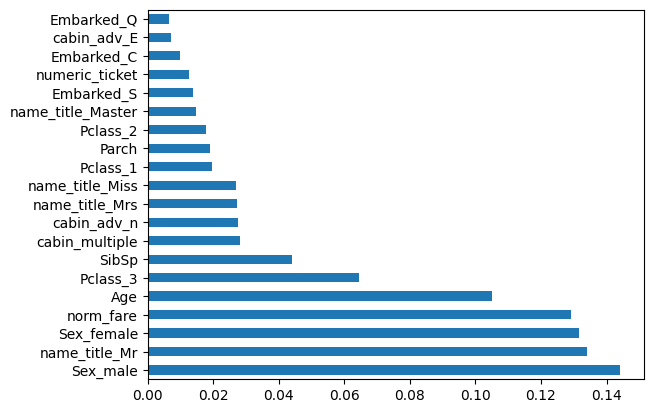

In [49]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [50]:
xgb = XGBClassifier(random_state=1)

param_grid = {
    'n_estimators': [450, 500, 550],
    'colsample_bytree': [0.75, 0.80, 0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.60, 0.65],
    'learning_rate': [0.5],
    'gamma': [0.5, 1, 2],
    'min_child_weight': [0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_xgb = clf_xgb.fit(X_train, y_train)
clf_performance(best_clf_xgb, 'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score:      0.8549101758395226
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [51]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
#submission_xgb.to_csv('xgb_submission3.csv', index=False)

## Model Additional Ensemble Approaches

In [53]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting='hard')
voting_clf_soft = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting='soft')
voting_clf_all = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('lr', best_lr)], voting='soft')
voting_clf_xgb = VotingClassifier(estimators=[('knn', best_knn), ('rf', best_rf), ('xgb', best_xgb), ('lr', best_lr)], voting='hard')

print(f'voting_clf_hard: {cross_val_score(voting_clf_hard, X_train, y_train, cv=5)}')
print(f'voting_clf_hard mean: {cross_val_score(voting_clf_hard, X_train, y_train, cv=5).mean()}')

print(f'voting_clf_soft: {cross_val_score(voting_clf_soft, X_train, y_train, cv=5)}')
print(f'voting_clf_soft mean: {cross_val_score(voting_clf_soft, X_train, y_train, cv=5).mean()}')

print(f'voting_clf_all: {cross_val_score(voting_clf_all, X_train, y_train, cv=5)}')
print(f'voting_clf_all mean: {cross_val_score(voting_clf_all, X_train, y_train, cv=5).mean()}')

print(f'voting_clf_xgb: {cross_val_score(voting_clf_xgb, X_train, y_train, cv=5)}')
print(f'voting_clf_xgb mean: {cross_val_score(voting_clf_xgb, X_train, y_train, cv=5).mean()}')

voting_clf_hard: [0.79213483 0.81460674 0.82022472 0.79775281 0.83615819]
voting_clf_hard mean: 0.8121754586427983
voting_clf_soft: [0.78651685 0.81460674 0.81460674 0.79775281 0.85310734]
voting_clf_soft mean: 0.8133180981400369
voting_clf_all: [0.80898876 0.83146067 0.8258427  0.80898876 0.85875706]
voting_clf_all mean: 0.8268075922046595
voting_clf_xgb: [0.83707865 0.83146067 0.88202247 0.80337079 0.86440678]
voting_clf_xgb mean: 0.8436678727861361


In [54]:
params = {'weights': [[1, 1, 1], [1, 2, 1], [1, 1, 2], [2, 1, 1], [2, 2, 1], [1, 2, 2], [2, 1, 2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid=params, cv=5, verbose=True, n_jobs=-1)
best_clf_weight = vote_weight.fit(X_train_scaled, y_train)
clf_performance(best_clf_weight, 'VC Weights')
#voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best Score:      0.83244461372437
Best Parameters: {'weights': [1, 1, 1]}


In [56]:
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft = voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)

In [57]:
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': 
                   y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft': y_hat_vc_soft, 
                   'Survived_vc_all': y_hat_vc_all, 'Survived_vc_xgb': y_hat_vc_xgb}

comparison = pd.DataFrame(data=final_data_comp)

In [58]:
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis=1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis=1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis=1)

In [59]:
comparison.difference_hard_all.value_counts()

difference_hard_all
0    409
1      9
Name: count, dtype: int64

In [ ]:
submission.to_csv('submission_rf.csv', index=False)
submission_2.to_csv('submission_vc_hard.csv', index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
submission_4.to_csv('submission_vc_xgb2.csv', index=False)